# USG grants crawl
## Agency-specific replication from  Lee & Chung (2022)

### Previously

In the previous chapter we replicated some of our previous analysis, which was done with a list of open-science terms of our own creation, with an emperically derived list of terms derived from [Lee & Chung (2022)](https://doi.org/10.47989/irpaper949).  While the reults look compelling, and at least appear to plausible relatie to our intuitions, we should always be skeptical of our results until we do some thorough sanity checks.  

In this chapter we'll implement some sanity checks.  These will include confirming that the extreme ends of the term-matching distributions (e.g. many term matches vs no term matches) do indeed reflect the sorts of grants we would expect.  We'll also check to make sure that our quantative analyses of these descriptions actually return the sorts of results we would expect.

### Loading the database once more

Let's begin by loading up the database provided by the website, which is stored in an xml format.

In [1]:
# import our helper functions
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
sys.path
import grantsGov_utilities as grantsGov_utilities

# local data storage directory
localDataDir='inputData'

grantsDF=grantsGov_utilities.detectLocalGrantData(localPath='../'+localDataDir,forceDownload=True)
grantsDF

,OpportunityID,OpportunityTitle,OpportunityNumber,AgencyCode,AgencyName,AwardCeiling,AwardFloor,EstimatedTotalProgramFunding,ExpectedNumberOfAwards,Description
0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,DOS-SA,Bureau of South and Central Asian Affairs,600000,400000,600000,1,The Office of Press and Public Diplomacy of th...
1,262149,Eradication of Yellow Crazy Ants on Johnston A...,F14AS00402,DOI-FWS,Fish and Wildlife Service,0,0,0,NaN,Funds under this award are to be used for the ...
2,131073,"Cooperative Ecosystem Studies Unit, Piedmont S...",G12AS20003,DOI-USGS1,Geological Survey,0,0,31900,1,The USGS Southeast Ecological Science Center s...
3,131094,Plant Feedstock Genomics for Bioenergy: A Joi...,DE-FOA-0000598,PAMS-SC,Office of Science,500000,200000,6000000,10,The U.S. Department of Energy&apos;s Office of...
4,131095,Management of HIV-Related Lung Disease and Car...,RFA-HL-12-034,HHS-NIH11,National Institutes of Health,400000,NaN,2000000,NaN,This FOA invites clinical trials planning gran...
...,...,...,...,...,...,...,...,...,...,...
70325,262109,2014/2015 Social Responsibility through Englis...,RELO-BP-MOB,DOS-HUN,U.S. Mission to Hungary,152418,152418,152418,1,"In close consultation with RELO Budapest, the ..."
70326,262108,"Notice of Intent to Award - Fort McHenry, Balt...",NPS-14-NERO-0124,DOI-NPS,National Park Service,65000,65000,65000,1,United States Department of the Interior Natio...
70327,262112,Fish and Wildlife Coordination Act,R14AS00070,DOI-BOR,Bureau of Reclamation,525000,525000,525000,1,"To provide financial assistance, through grant..."
70328,131053,USAID/Uganda Literacy and Health Education Pro...,RFA-617-12-000001,USAID-UGA,Uganda USAID-Kampala,57000000,0,57000000,1,Literacy Program is a 5-year program to improv...


## Cleaning
As before, we need to do a bit of cleaning, so lets do a more comprehensive version of that here.

Note:  This may take a moment

In [2]:
grantsDF=grantsGov_utilities.prepareGrantsDF(grantsDF, repair=True)
grantsDF

OpportunityID                    int64
OpportunityTitle                object
OpportunityNumber               object
AgencyCode                      object
AgencyName                      object
AwardCeiling                     int64
AwardFloor                       int64
EstimatedTotalProgramFunding     int64
ExpectedNumberOfAwards           int64
Description                     object
dtype: object
62144 grant agency name or code value records altered


C:\Users\dbullock\Documents\code\gitDir\USG_grants_crawl\src\grantsGov_utilities.py:216: UserWarning: NOTE: this function CHANGES the values / content of the grantsDF from the information contained on grants.gov, including but not limited to adding data columns, replacing null/empty values, and/or inferring missing values.
  warn('NOTE: this function CHANGES the values / content of the grantsDF from the information contained on grants.gov, including but not limited to adding data columns, replacing null/empty values, and/or inferring missing values.')


28027 grant funding value records repaired


,OpportunityID,OpportunityTitle,OpportunityNumber,AgencyCode,AgencySubCode,AgencyName,AwardCeiling,AwardFloor,EstimatedTotalProgramFunding,ExpectedNumberOfAwards,Description
0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,DOS,SA,Bureau of South and Central Asian Affairs,600000,400000,600000,1,The Office of Press and Public Diplomacy of th...
1,262149,Eradication of Yellow Crazy Ants on Johnston A...,F14AS00402,DOI,FWS,Fish and Wildlife Service,0,0,0,0,Funds under this award are to be used for the ...
2,131073,"Cooperative Ecosystem Studies Unit, Piedmont S...",G12AS20003,DOI,USGS1,Geological Survey,0,0,31900,1,The USGS Southeast Ecological Science Center s...
3,131094,Plant Feedstock Genomics for Bioenergy: A Joi...,DE-FOA-0000598,PAMS,SC,Office of Science,500000,200000,6000000,10,The U.S. Department of Energy&apos;s Office of...
4,131095,Management of HIV-Related Lung Disease and Car...,RFA-HL-12-034,HHS,NIH11,National Institutes of Health,400000,0,2000000,0,This FOA invites clinical trials planning gran...
...,...,...,...,...,...,...,...,...,...,...,...
70325,262109,2014/2015 Social Responsibility through Englis...,RELO-BP-MOB,DOS,HUN,U.S. Mission to Hungary,152418,152418,152418,1,"In close consultation with RELO Budapest, the ..."
70326,262108,"Notice of Intent to Award - Fort McHenry, Balt...",NPS-14-NERO-0124,DOI,NPS,National Park Service,65000,65000,65000,1,United States Department of the Interior Natio...
70327,262112,Fish and Wildlife Coordination Act,R14AS00070,DOI,BOR,Bureau of Reclamation,525000,525000,525000,1,"To provide financial assistance, through grant..."
70328,131053,USAID/Uganda Literacy and Health Education Pro...,RFA-617-12-000001,USAID,UGA,Uganda USAID-Kampala,57000000,0,57000000,1,Literacy Program is a 5-year program to improv...


### Keywords and terms

Although we aren't going to inspect the keywords and agencies on their own this time, we still need to collect them.  Once we have loaded them, we can determine which words are occuring in which grants.  The resulting information can be placed in a dictionary, where the relevant information can be accessed by using the [tuple](https://www.w3schools.com/python/python_tuples.asp) corresponding to the desired agency and keyword (e.g. ('agency','keyword')).  From this data structure, we can compute the frequency with which grant IDs are appearing, select the top three, and three random grants that do not appear in the listing.

In [3]:
import json
import seaborn as sns
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

#HERE'S THE CHANGE FROM THE PREVOUS NOTEBOOK
# open the keywords csv file
inputKeywords=pd.read_csv('../OSterms_LeeChung2022.csv')

# split it into a list.  Each term is kept on a separate line
keywords=inputKeywords['terms'].tolist()

# find the grants that are associated with these keywords
grantFindsOut=grantsGov_utilities.searchGrantsDF_for_keywords(grantsDF,keywords)

# get a count of the counts for the unique grant IDs
allFoundGrantIDConcatList=[grantID for keywordMatches in grantFindsOut.values() for grantID in keywordMatches]
grantIDs,counts=np.unique(allFoundGrantIDConcatList, return_counts=True)
topIndexes=np.argsort(counts)
print(grantIDs[topIndexes[-5:-1]])
print(counts[topIndexes[-5:-1]])

[277850 313304 314590 344912]
[ 9  9  9 10]


### Viewing the top match

Now what we have the match counts and their indexes, lets look at the description of the grant that has the most matches.

In [4]:
#set up a clean text printing method
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# get the description match for the current text
topMatchText=grantsDF['Description'].loc[grantsDF['OpportunityID'].eq(grantIDs[topIndexes[-1]])].values[0]
# bold the words that match
for iKeyword in keywords:

    topMatchText=topMatchText.replace(iKeyword,'**'+iKeyword+'**')
# display the text as markdown
printmd(topMatchText)

the idea development award is intended to support new ideas that represent innovative approaches to prostate cancer **research** and have the potential to make an important contribution to the pcrp mission. the key components of this award mechanism are: **innovation**: **research** deemed innovative may represent a new paradigm, challenge current paradigms, look at existing problems from new perspectives, leverage unique study populations, or exhibit other highly creative qualities. **research** that is an incremental advance upon published data is not considered innovative. multidisciplinary projects are especially encouraged. impact: applications are required to address and provide a solution to one or more of the fy19 pcrp overarching challenges. the potential impact of the **research**, both shortterm and longterm, in addressing the fy19 pcrp overarching challenge(s) should be clearly described. highimpact **research** will, if successful, significantly advance prostate cancer **research** and/or patient care. preliminary data: due to this award&#8217;s emphasis on **innovation**, the presentation of preliminary data relevant to prostate cancer and the proposed project is encouraged, but not required. any unpublished, preliminary data provided should originate from the laboratory of the principal investigator (pi) or a member(s) of the **research** team. regardless whether preliminary data is included or not, applications should be based on a sound scientific rationale that is established through logical reasoning and/or critical review and analysis of the literature. to maximize the potential for impact, investigators are strongly encouraged to incorporate the following components into their study design where appropriate: authentication of proposed cell lines; statistical rigor of preclinical animal experiments and epidemiological studies; incorporation of experiments to assess clinical relevance and translatability of findings; and validation in patient cohorts. as such, the pcrpfunded prostate cancer biorepository network (pcbn) (http://www.prostatebiorepository.org) and/or the north carolina &#8211; louisiana prostate cancer project (pcap) (https://pcap.bioinf.unc.edu) are important resources to consider if retrospectively collected human anatomical substances or correlated clinical data are critical to the proposed studies. studies utilizing data derived from large patient studies that include longterm health records, biospecimen **repositories**, and preexisting **research** and that apply stateoftheart genomic and/or proteomic analysis, **bioinformatics**, and/or mathematical models to such data are also encouraged. new investigator category: the idea development award mechanism encourages **research** ideas from investigators in the early stages of their careers. the new investigator category of this award mechanism is designed to allow applications naming pis early in their faculty appointments, or in the process of developing independent **research** careers, to compete for funding separately from established investigators. all new investigator applicants must meet specific eligibility criteria as described in section ii.c, eligibility information. pis using the new investigator category are required to include a collaborator (or collaborators) appropriate to the application who has experience in prostate cancer **research** as demonstrated by a record of funding and publications in prostate cancer **research**. it is the responsibility of the pi to describe how the **collaboration**(s) will augment his or her expertise to best address the **research** question. multidisciplinary projects are encouraged, and multiinstitutional projects are allowed. each proposed study must include a clearly stated plan for interactions among all team members and organizations involved. the plan must include communication, coordination of **research** progress and results, and data transfer. additionally, multiinstitutional applications must provide an **intellectual property** plan to resolve potential intellectual and material property issues and to remove institutional barriers that might interfere with achieving high levels of cooperation to ensure the successful completion of this award. **research** involving human subjects is permitted under this funding opportunity; however clinical trials are not allowed under this funding opportunity. correlative studies associated with an existing clinical trial are particularly encouraged, provided they are determined to be no greater than minimal risk by the institutional review board (irb) of record and the u.s. army medical **research** and materiel command (usamrmc) office of **research** protections (orp), human **research** protection office (hrpo). pis seeking funding for a clinical trial are encouraged to consider submitting an application to the fy19 pcrp clinical trial award (funding opportunity number: w81xwh19pcrpcta). a congressionally mandated metastatic cancer task force was formed with the purpose of identifying ways to help accelerate clinical and translational **research** aimed at extending the lives of advanced state and recurrent patients. as a member of the metastatic cancer task force, cdmrp encourages applicants to review the recommendations (https://health.mil/referencecenter/congressionaltestimonies/2018/05/03/metastaticcancer**research**) and submit **research** ideas to address these recommendations provided they are within the limitations of this funding opportunity and fit within the fy19 pcrp priorities. the proposed **research** must be relevant to active duty service members, veterans, military beneficiaries, and/or the american public. the anticipated direct costs budgeted for the entire period of performance for an fy19 idea development award will not exceed $600,000 for new investigators or $750,000 for established investigators. refer to section ii.d.5, funding restrictions, for detailed funding information. the cdmrp expects to allot approximately $35.52m to fund approximately 12 new investigator and 20 established investigator idea development award applications. funding of applications received is contingent upon the availability of federal funds for this program as well as the number of applications received, the quality and merit of the applications as evaluated by scientific and programmatic review, and the requirements of the government. funds to be obligated on any award resulting from this funding opportunity will be available for use for a limited time period based on the fiscal year of the funds. it is anticipated that awards made from this fy19 funding opportunity will be funded with fy19 funds, which will expire for use on september 30, 2025. awards will be made no later than september 30, 2020. for additional information, refer to section ii.f.1, federal award notices. the types of awards made under the program announcement will be assistance agreements (grants or cooperative agreements). the level of involvement on the part of the department of defense (dod) during project performance is the key factor in determining whether to award a grant or cooperative agreement. an assistance agreement (grant or cooperative agreement) is appropriate when the federal government transfers a &#8220;thing of value&#8221; to a &#8220;state, local government,&#8221; or &#8220;other recipient&#8221; to carry out a public purpose of support or stimulation authorized by a law of the united states, instead of acquiring property or service for the direct benefit and use of the u.s. government. an assistance agreement can take the form of a grant or cooperative agreement. if &#8220;no substantial involvement&#8221; on the part of the funding agency is anticipated, a grant award will be made (31 usc 6304). conversely, if substantial involvement on the part of the funding agency is anticipated, a cooperative agreement will be made (31 usc 6305) and the award will identify the specific substantial involvement. substantial involvement may include **collaboration**, participation, or intervention in the **research** to be performed under the award. the award type, along with the start date, will be determined during the negotiation process. clinical trials are not allowed. new fy19 definition: a clinical trial is a **research** study in which one or more human subjects are prospectively assigned to one or more interventions (which may include placebo or other control) to evaluate the effects of the interventions on biomedical or behavioral healthrelated outcomes. **research** involving human anatomical substances, human subjects, or human cadavers: all dodfunded **research** involving new and ongoing **research** with human anatomical substances, human subjects, or human cadavers must be reviewed and approved by the usamrmc orp, human **research** protection office (hrpo), prior to **research** implementation. this administrative review requirement is in addition to the local institutional review board (irb) or **ethics** committee (ec) review. local irb/ec approval at the time of submission is not required. the hrpo is mandated to comply with specific laws and requirements governing all **research** involving human anatomical substances, human subjects, or human cadavers that is supported by the dod. these laws and requirements will necessitate information in addition to that supplied to the irb/ec. allow a minimum of 2 to 3 months for hrpo regulatory review and approval processes. additional time for regulatory reviews may be needed for clinical studies taking place in international settings. when possible, protocols should be written for **research** with human subjects and/or human anatomical substances that are specific to the dodsupported effort outlined in the submitted application as a standalone study. submission to hrpo of protocols involving more than the scope of work in the dodfunded award will require hrpo review of the entire protocol (dod and nondod funded). dod human subjects protection requirements may be applied to nondod funded work and necessitate extensive revisions to the protocol. applications that involve recruitment of human subjects must indicate the quarterly enrollment targets across all sites in attachment 5: statement of work (sow). successful applicants will work with usamraa to establish milestones for human subjects recruitment. continued support for the project will be based upon satisfactory progress in meeting the established milestones. refer to the general application instructions, appendix 1, and the human subject resource document available on the electronic biomedical **research** application portal (ebrap) &#8220;funding opportunities &amp; forms&#8221; web page (https://ebrap.org/ebrap/public/program.htm) for additional information. use of dod or department of veterans affairs (va) resources: if the proposed **research** involves access to active duty military patient populations and/or dod resources or **database**s, the application must describe the access at the time of submission and include a plan for maintaining access as needed throughout the proposed **research**. access to target active duty military patient population(s) and/or dod resource(s) or **database**(s) should be confirmed by including a letter of support, signed by the lowestranking person with approval authority. if the proposed **research** involves access to va patient populations, va study resources and **database**s, and/or va **research** space and equipment, va principal investigators (pi)s/copis must have a plan for obtaining and maintaining access throughout the proposed **research**. access to va patients, resources, and/or va **research** space should be confirmed by including a letter of support from the va facility director(s) or individual designated by the va facility director(s), such as the associate chief of staff for **research** and development (acos/r&amp;d) or clinical service chief. if appropriate, the application should identify the vaaffiliated nonprofit corporation (npc) as the applicant institution for va pis. if the va npc is not identified as the applicant institution for administering the funds, the application should include a letter from the va acos/r&amp;d confirming this arrangement and identifying the institution that will administer the funds associated with the proposed **research**. access to certain dod or va patient populations, resources, or **database**s may only be obtained by **collaboration** with a dod or va investigator who has a substantial role in the **research** and may not be available to a nondod or nonva investigator if the resource is restricted to dod or va personnel. investigators should be aware of which resources are available to them if the proposed **research** involves a nondod or nonva investigator collaborating with the dod and/or va. if access cannot be confirmed at the time of application submission, the government reserves the right to withdraw or revoke funding until the pi has demonstrated support for and access to the relevant population(s) and/or resource(s). refer to section ii.d.2.b.ii, full application submission components, for detailed information. **research** involving animals: all dodfunded **research** involving new and ongoing **research** with animals must be reviewed and approved by the usamrmc orp animal care and use review office (acuro), in addition to the local institutional animal care and use committee (iacuc) of record. iacuc approval at the time of submission is not required. specific documents relating to the use of animals in the proposed **research** will be requested if the application is selected for funding. the acuro must review and approve all animal use prior to the start of working with animals, including amendments to ongoing projects. pis must submit the institutional animal use protocol, iacuc approval of that protocol, and a version of the animal use appendix titled, &#8220;**research** involving animals.&#8221; allow at least 2 to 3 months for acuro regulatory review and approval processes for animal studies. refer to the general application instructions, appendix 1, for additional information. all projects should adhere to a core set of standards for rigorous study design and reporting to maximize the **reproducibility** and translational potential of preclinical **research**. the standards are described in landis, s.c., et al., a call for transparent reporting to optimize the predictive value of preclinical **research**, nature 2012, 490:187191 (www.nature.com/nature/journal/ v490/n7419/full/nature11556.html). while these standards are written for preclinical studies, the basic principles of randomization, blinding, samplesize estimation, and data handling derive from wellestablished best practices in clinical studies. applicants should consult the arrive (animal **research**: reporting in vivo experiments) guidelines to ensure relevant aspects of rigorous animal **research** are adequately planned for and, ultimately, reported. the arrive guidelines can be found at https://www.elsevier.com/__data/promis_misc/ 622936arrive_guidelines.pdf. the cdmrp intends that information, data, and **research** resources generated under awards funded by this program announcement be made available to the **research** community (which includes both scientific and consumer advocacy communities) and to the public at large. for additional guidance, refer to the general application instructions, appendix 2, section k.

#### Evaluating the top match

In the above block, words matching keywords from our search list should be bolded.  There should be **ten** unique words bolded.

One thing to note right from the start is that there is a lot of text in this description.  Going back to the histogram we generated in the "Open Science Overview" chapter, this description is certianly in the right tail of that distribution with 750 words.  As such, simply due to there being more potential words to match upon, we might expect this description has a higher likelihood of meeting our inclusion criteria.

One other thing to note is that, although the word research shows up an _extreme_ number of times, it only counts as a single hit, so we needn't be concerned that resuse of a term is unfairly biasing our search algorithm results.

In any case, we can see that this isn't a grant which is _directly_ targeting open science.  Rather, it seems to be seeking submissions which are largely consistent with the values of open science.  In this way, this grant opportunity can be seen as an effort to fund open science (in that it seeks to fund the conduct of scientific investigations which are aligned with the principles of open science).  As such, it seems fairly reasonble that this grant would show up in our corpus.  That being said, we should also note that we shouldn't consider the _magnitude_ of the match (i.e. ten matching terms) as an indicator of how strong the grant's alignment is with the prinicples of open science.

Let's take a look at match two.

### Viewing the second top match

In [5]:
# get the description match for the current text
secondTopMatchText=grantsDF['Description'].loc[grantsDF['OpportunityID'].eq(grantIDs[topIndexes[-2]])].values[0]
# bold the words that match
for iKeyword in keywords:

    secondTopMatchText=secondTopMatchText.replace(iKeyword,'**'+iKeyword+'**')
# display the text as markdown
printmd(secondTopMatchText)

the geosciences open science ecosystem (geo ose) program seeks to support sustainable and networked open science activities to foster an ecosystem of inclusive access to data, physical collections, software, advanced computing, and other resources toward advancing **research** and education in the geosciences. the purpose of this support is to broadly enable geoscientists to leverage expanding information resources and computing capabilities to address interdisciplinary grand challenge **research** questions at the forefront of the geosciences. priority goals for geo ose are to: (i) improve the **openness** and scientific value of the existing network of cyberinfrastructure resources in the geosciences and related fields, such as data **repositories**, opensource software communities, and shared computing resources (e.g., highperformance and cloud computing), including via alignment on and adoption of common data and **metadata** standards that advance access and interoperability; (ii) democratize access to cyberinfrastructure capabilities that enable innovative geosciences **research** and education, including by advancing cloudbased approaches and **workflow**s; (iii) strengthen the capacity of current and future geoscientists to access, utilize, and collaborate within the growing ecosystem of open science resources; and (iv) contribute to advancing open science principles within the geosciences, including (but not limited to) the fair guiding principles for scientific **data management** and stewardship (findable, accessible, interoperable, reusable), the care principles for indigenous data governance (collective benefit, authority to control, responsibility, and **ethics**), and the trust principles for digital **repositories** (**transparency**, responsibility, user focus, sustainability, and technology), as well as **reproducibility** and **replicability**.

#### Evaluating the second top match 

In this example we find a much smaller body of text (240 words) but which still has 9 term matches.  Further more, we see that this description is spot-on for a direct and intentional open science-focused grant.  Indeed, it even uses the term "open science" directly.  This is precisely the kind of grant example we would hope to see.

### Viewing the fifth top match

Why are we viewing the fifth and not the third or fourth, you ask?  Because the text is remarkably similar to the first match, but with some small parts changed.  It seems that the DOD includes a great deal of boiler plate text in their grant submissions which covers the same topics. As such, much of what we said for that grant would apply here as well.

In [6]:
# get the description match for the current text
fifthTopMatchText=grantsDF['Description'].loc[grantsDF['OpportunityID'].eq(grantIDs[topIndexes[-5]])].values[0]
# bold the words that match
for iKeyword in keywords:

    fifthTopMatchText=secondTopMatchText.replace(iKeyword,'**'+iKeyword+'**')
# display the text as markdown
printmd(fifthTopMatchText)

the geosciences open science ecosystem (geo ose) program seeks to support sustainable and networked open science activities to foster an ecosystem of inclusive access to data, physical collections, software, advanced computing, and other resources toward advancing ****research**** and education in the geosciences. the purpose of this support is to broadly enable geoscientists to leverage expanding information resources and computing capabilities to address interdisciplinary grand challenge ****research**** questions at the forefront of the geosciences. priority goals for geo ose are to: (i) improve the **openness** and scientific value of the existing network of cyberinfrastructure resources in the geosciences and related fields, such as data **repositories**, opensource software communities, and shared computing resources (e.g., highperformance and cloud computing), including via alignment on and adoption of common data and **metadata** standards that advance access and interoperability; (ii) democratize access to cyberinfrastructure capabilities that enable innovative geosciences ****research**** and education, including by advancing cloudbased approaches and **workflow**s; (iii) strengthen the capacity of current and future geoscientists to access, utilize, and collaborate within the growing ecosystem of open science resources; and (iv) contribute to advancing open science principles within the geosciences, including (but not limited to) the fair guiding principles for scientific **data management** and stewardship (findable, accessible, interoperable, reusable), the care principles for indigenous data governance (collective benefit, authority to control, responsibility, and **ethics**), and the trust principles for digital **repositories** (**transparency**, responsibility, user focus, sustainability, and technology), as well as **reproducibility** and **replicability**.

#### Evaluating the fifth top match 

Here we see an example of a program directly soliciting technical capacties and expertise to augment existing organizations.  With respect to our open science investigation there are several key things to note.  One is the statement "Furthermore, the nps lacks specific technical expertise and information technology systems to address pressing research and data management issues".  In this statement we find a fascinating and candid acknowledgment about the National Park Service's current lack of capacity to meet the demands of open science.  Later, the description provides an overview of the citizen science and participant involvment in the associated projects, noting the broad involvment of a great many individuals--a sure hallmark of a a desired open science outcome.

### Checking a non match

As a further sanity check we can also look at at a random grant description that does not have one of our terms in it.  Note that, because this is randomly selected, we are unable to prepare an analysis of the resulting example.  In fact, the selected example may not have a description at all.  If this is the case, just rerun the block, and a new example should be provided.  Occurances of keywords (of which there should be none) will be bolded.

In [20]:
import random
randomID=random.choice(list(set(list(grantsDF['OpportunityID'].values)) - set(grantIDs)))
# get the description match for the current text
randomText=grantsDF['Description'].loc[grantsDF['OpportunityID'].eq(randomID)].values[0]
# bold the words that match
for iKeyword in keywords:
    randomText=randomText.replace(iKeyword,'**'+iKeyword+'**')
# display the text as markdown
printmd(randomText)

the national institute of corrections (nic), community corrections division, is seeking applications for the development of evidence based strategic plans in four southern california county probation departments. efforts to develop initial plans in county probation departments will happen over a 9month period, and will be carried out in conjunction with the nic community corrections division. nic community corrections staff will direct and participate in the planning efforts to ensure consistency with other evidence based planning and implementation work coordinated through nic. note that this particular cooperative agreement is intended to cover only the initial strategic planning phase for each site, as described below in the section entitled &#147;supplementary information.&#148;

### A new metric

Several of our above observations, when taken togther, suggest a new metric which may be of interest to us.  We noted that, as a description grew to have mords, the likelyhood of one of those being a word in the keyword list grew.  However, for the particularly salient example (the number 2 top match), there were much fewer words, with still a substantial number of matches (9).  What if we created a metric which took in to account the number of matches, but normalized by the number of (unique) words.  Let's try this.  

We'll also impose a minimum threshold for the number of words the description must obtain for this "density" metric to be computed.  Many descriptions have fewer than 10 words, which likely doesn't actually convey an informative description of the relevant target activities.  

<Figure size 3200x1600 with 0 Axes>

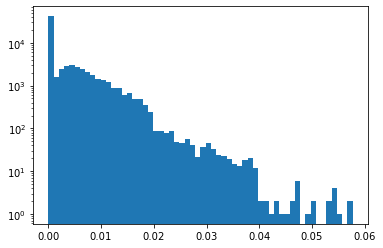

<Figure size 3200x1600 with 0 Axes>

In [53]:
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

#create a word tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# add a column to the dataframe
grantsDF['WordCount']=grantsDF['Description'].apply(lambda x: len(tokenizer.tokenize((x))))
# initialize a KeywordMatches column
grantsDF['KeywordMatches']=0
# in a quick but inelegant way, add the count to the relevant location
for iIndex,iGrantIDs in enumerate(grantIDs):
    grantsDF['KeywordMatches'].loc[grantsDF['OpportunityID'].eq(iGrantIDs)]=counts[iIndex]

# set a threshold parameter
wordCountThreshold=50
    
grantsDF['KeywordProportion']=0
# compute the proportion of keywords to words
for iIndex,iRows in grantsDF.iterrows():
    if iRows['KeywordMatches'] > 0 and iRows['WordCount']>wordCountThreshold:
        grantsDF['KeywordProportion'].loc[iIndex] = iRows['KeywordMatches']/iRows['WordCount']
        
# plot the histogram for these
# seaborn makes this overcomplicated, so just use matplotlib
binSize=.001
binNumber=int(np.ceil(np.max(grantsDF['KeywordProportion'].values)/binSize))
plt.yscale('log')
plt.hist(np.asarray(grantsDF['KeywordProportion'].values),bins=binNumber)
# this isn't working for some reason
plt.figure(figsize=(16, 8), dpi=200)

Let's look at the top few examples of these.

#### Top 5 keyword density results

In [59]:
densitySortedGrants=grantsDF.sort_values(by='KeywordProportion',ascending=False).head(20)
for i in range(5):
    currText=densitySortedGrants['Description'].iloc[i]
    for iKeyword in keywords:
        currText=currText.replace(iKeyword,'**'+iKeyword+'**')
    printmd(currText)

the purpose of this funding opportunity announcement (foa) is to promote **research** that transforms understanding of hiv transmission, the hiv care continuum, and hiv comorbidities using **big data** science (bds). these approaches should include projects to assemble **big data** sources, conduct robust and reproducible analyses, and create meaningful visualization of **big data**.

the purpose of the administrative supplement is to provide support for nihfunded investigators to prepare and deposit individuallevel data from cancer epidemiology studies into nih/ncisupported, controlledaccess **database**s including the cancer epidemiology data repository (cedr) and the **database** of genotypes and phenotypes (dbgap). sharing of ****research** data** will accelerate scientific discovery and increase opportunities for **collaboration** to provide new clues to cancer etiology, determine risk factors, and improve cancer survivorship.

this funding opportunity announcement (foa) invites applications that propose to foster **data sharing** and wider use of longitudinal data for **research** on aging in the behavioral and **social sciences**. it encourages applications for a cooperative agreement to promote data archiving, dissemination, and consultation with producers and users of data resources for **research** on aging.

the graduate **research** **innovation** (grin) award is for current master and doctoral students enrolled at colleges or universities within the united states in the field of wildland fire and related physical, biological, and **social sciences**, to enhance student exposure to the management and policy relevance of their **research** to achieve beneficial outcomes of funded work.

this ra solicits groundbreaking singleinvestigator proposals from junior faculty for **research** and development in the areas of physical sciences, engineering, mathematics, medicine, biology, information and **social sciences** of interest to darpa&#146;s defense sciences office (dso), microsystems technology office (mto), and information **innovation** office (i2o). see attached darpara1212. see attached modification 2 to darpara1212.

#### Assesment

While the first three results seem to be relatively consistent with what we're seeking, the latter two don't seem as precisely aligned with open-science as we might hope.

As such, lets move to the next chapter to start applying more complex tools for examining these grant descriptions.